In [1]:
from util_comp import *
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster
from sklearn.preprocessing import StandardScaler

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Makes sure we see all columns
pd.set_option('display.max_columns', None)

In [2]:
data = main(one_hot=True, dataV=pd.read_csv("data/BST_V2toV9.csv", header=0, sep=";"), retained=True)

Elapsed time to compute age categorisation: 0 minutes and 0 seconds
Elapsed time to compute correct systematic error: 0 minutes and 9 seconds
Elapsed time to compute load column names: 0 minutes and 0 seconds
Elapsed time to compute clean data: 0 minutes and 0 seconds
Elapsed time to compute categorisation of outcome column: 0 minutes and 3 seconds
Elapsed time to compute change values in catagorical columns: 1 minutes and 34 seconds
Elapsed time to compute OneHotEncoding: 0 minutes and 1 seconds
Elapsed time to compute Full process: 1 minutes and 47 seconds


In [3]:
data.head()

Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                  1                                                                   
1                                                  0                                                                   
2                                                  0                                                                   
3                                                  0                                                                   
4                                                  0                                                                   

   Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                2.0                                                                    
1                                                0.0                                                                    
2                                                0.0                                                                    
3                                                0.0                                                                    
4                                                0.0                                                                    

   Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                  0                                                                     
1                                                  0                                                                     
2                                                  1                                                                     
3                                                  0                                                                     
4                                                  0                                                                     

   Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?  \
0                                                  0                                                                    
1                                                  0                                                                    
2                                                  1                                                                    
3                                                  0                                                                    
4                                                  0                                                                    

   outcome  (YEAR MMS_2,)  (YEAR MMS_3,)  (YEAR MMS_4,)  (YEAR MMS_5,)  \
0        2              1              0              0              0   
1        1              1              0              0              0   
2        3              1              0              0              0   
3        0              1              0              0              0   
4        2              1              0              0              0   

   (YEAR MMS_6,)  (YEAR MMS_7,)  (YEAR MMS_8,)  (YEAR MMS_9,)  \
0              0              0              0              0   
1              0              0              0              0   
2              0              0              0              0   
3              0              0              0              0   
4              0              0              0              0   

   (Q1- Your sex?_A man,)  (Q1- Your sex?_A woman,)  (Q1- Your sex?_nan,)  \
0                       1                         0                     0   
1                       1                         0                     0   
2                       0   

In [4]:
data.describe()

Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       37681.000000                                                                   
mean                                            0.183302                                                                   
std                                             0.452550                                                                   
min                                             0.000000                                                                   
25%                                             0.000000                                                                   
50%                                             0.000000                                                                   
75%                                             0.000000                                                                   
max                                             9.000000                                                                   

       Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       37680.000000                                                                    
mean                                            0.243471                                                                    
std                                             0.558963                                                                    
min                                             0.000000                                                                    
25%                                             0.000000                                                                    
50%                                             0.000000                                                                    
75%                                             0.000000                                                                    
max                                             9.000000                                                                    

       Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       37681.000000                                                                     
mean                                            0.192431                                                                     
std                                             0.483806                                                                     
min                                             0.000000                                                                     
25%                                             0.000000                                                                     
50%                                             0.000000                                                                     
75%                                             0.000000                                                                     
max                                             9.000000                                                                     

       Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?  \
count                                       37681.000000                                                                    
mean                                            0.201799                                                                    
std                                             0.554549                                                                    
min                                             0.000000                                                                    
25% 

In [5]:
not_cat = [
    "Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?",
    "outcome"
]

# catagorical columns (everything other than the non_categorical columns)
categorical_cols = [col for col in data.columns if col not in not_cat]

In [6]:
categorical_cols = [col for col in data.columns if col not in not_cat]
data_features = data.drop('outcome', axis=1)
# one hot encode the data
data2 = pd.get_dummies(data_features[categorical_cols], drop_first=True)
data = pd.concat([data2, data['outcome']], axis=1)

In [7]:
data_copy = data.copy()

In [8]:
# df_features = data.drop(categorical_cols, axis=1)
df_features = data.drop("outcome", axis=1)
df_features.columns = [str(col) for col in df_features.columns]

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(df_scaled ,columns=df_features.columns)

In [9]:
data_copy['outcome']

0        2
1        1
2        3
3        0
4        2
        ..
37676    3
37677    2
37678    0
37679    0
37680    1
Name: outcome, Length: 37681, dtype: int64

In [10]:
# Transpose so that each row is a feature
df_transposed = df_scaled.transpose()

np.shape(df_transposed)

(433, 37681)

In [11]:
# Check for non-finite values
if not np.all(np.isfinite(df_transposed.values)):
    print("Data contains non-finite values.")
    print(df_transposed[~np.isfinite(df_transposed).all(axis=1)])
else:
    print("Data is finite.")

# Handle non-finite values (example: filling NaNs with the column mean)
df_transposed = df_transposed.apply(lambda x: x.fillna(x.mean()), axis=0)

# Verify again if all values are finite
if not np.all(np.isfinite(df_transposed.values)):
    raise ValueError("There are still non-finite values in the data.")
else:
    print("All values are now finite.")


Data is finite.
All values are now finite.


In [12]:
# Perform hierarchical clustering on features
linked = linkage(df_transposed , method='ward', metric='euclidean', optimal_ordering=True)

np.shape(linked)

(432, 4)

In [13]:
df_linked = pd.DataFrame(linked, columns=['c1','c2','distance','size']) 
# c1 and c2 are the two clusters that are being joined
# distance is the distance between the two clusters
# size is the number of features in the cluster

df_linked[['c1','c2','size']] = df_linked[['c1','c2','size']].astype('int')

df_linked.tail()

c1   c2     distance  size
427  856  852   662.995690   123
428  842  860   721.548529   148
429  861  859   924.410723   353
430  862  854   968.729926   404
431  858  863  1343.418723   433

In [14]:
from scipy.cluster.hierarchy import inconsistent

incons = inconsistent(linked)
print(incons)

[[0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [1.51151876e+01 1.01859848e-07 1.00000000e+00 0.00000000e+00]
 [2.37683521e+01 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 ...
 [7.60717821e+02 1.48046833e+02 3.00000000e+00 1.10568324e+00]
 [8.02256177e+02 2.50939769e+02 3.00000000e+00 6.63401222e-01]
 [9.76006413e+02 3.63828644e+02 3.00000000e+00 1.00984987e+00]]


In [15]:
# !pip install gap-stat
from gap_statistic import OptimalK

optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(df_transposed, cluster_array=np.arange(1, 60))
print(f"Optimal number of clusters: {n_clusters}")


Optimal number of clusters: 57


In [16]:
# threshold for optimal number of clusters
threshold = df_linked.loc[238-n_clusters, 'distance']

print(f"Threshold for optimal number of clusters: {threshold}")

Threshold for optimal number of clusters: 231.7741080613769


In [17]:
# number of clusters based on threshold

clusters = fcluster(linked, n_clusters, criterion='maxclust')
np.unique(clusters)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57], dtype=int32)

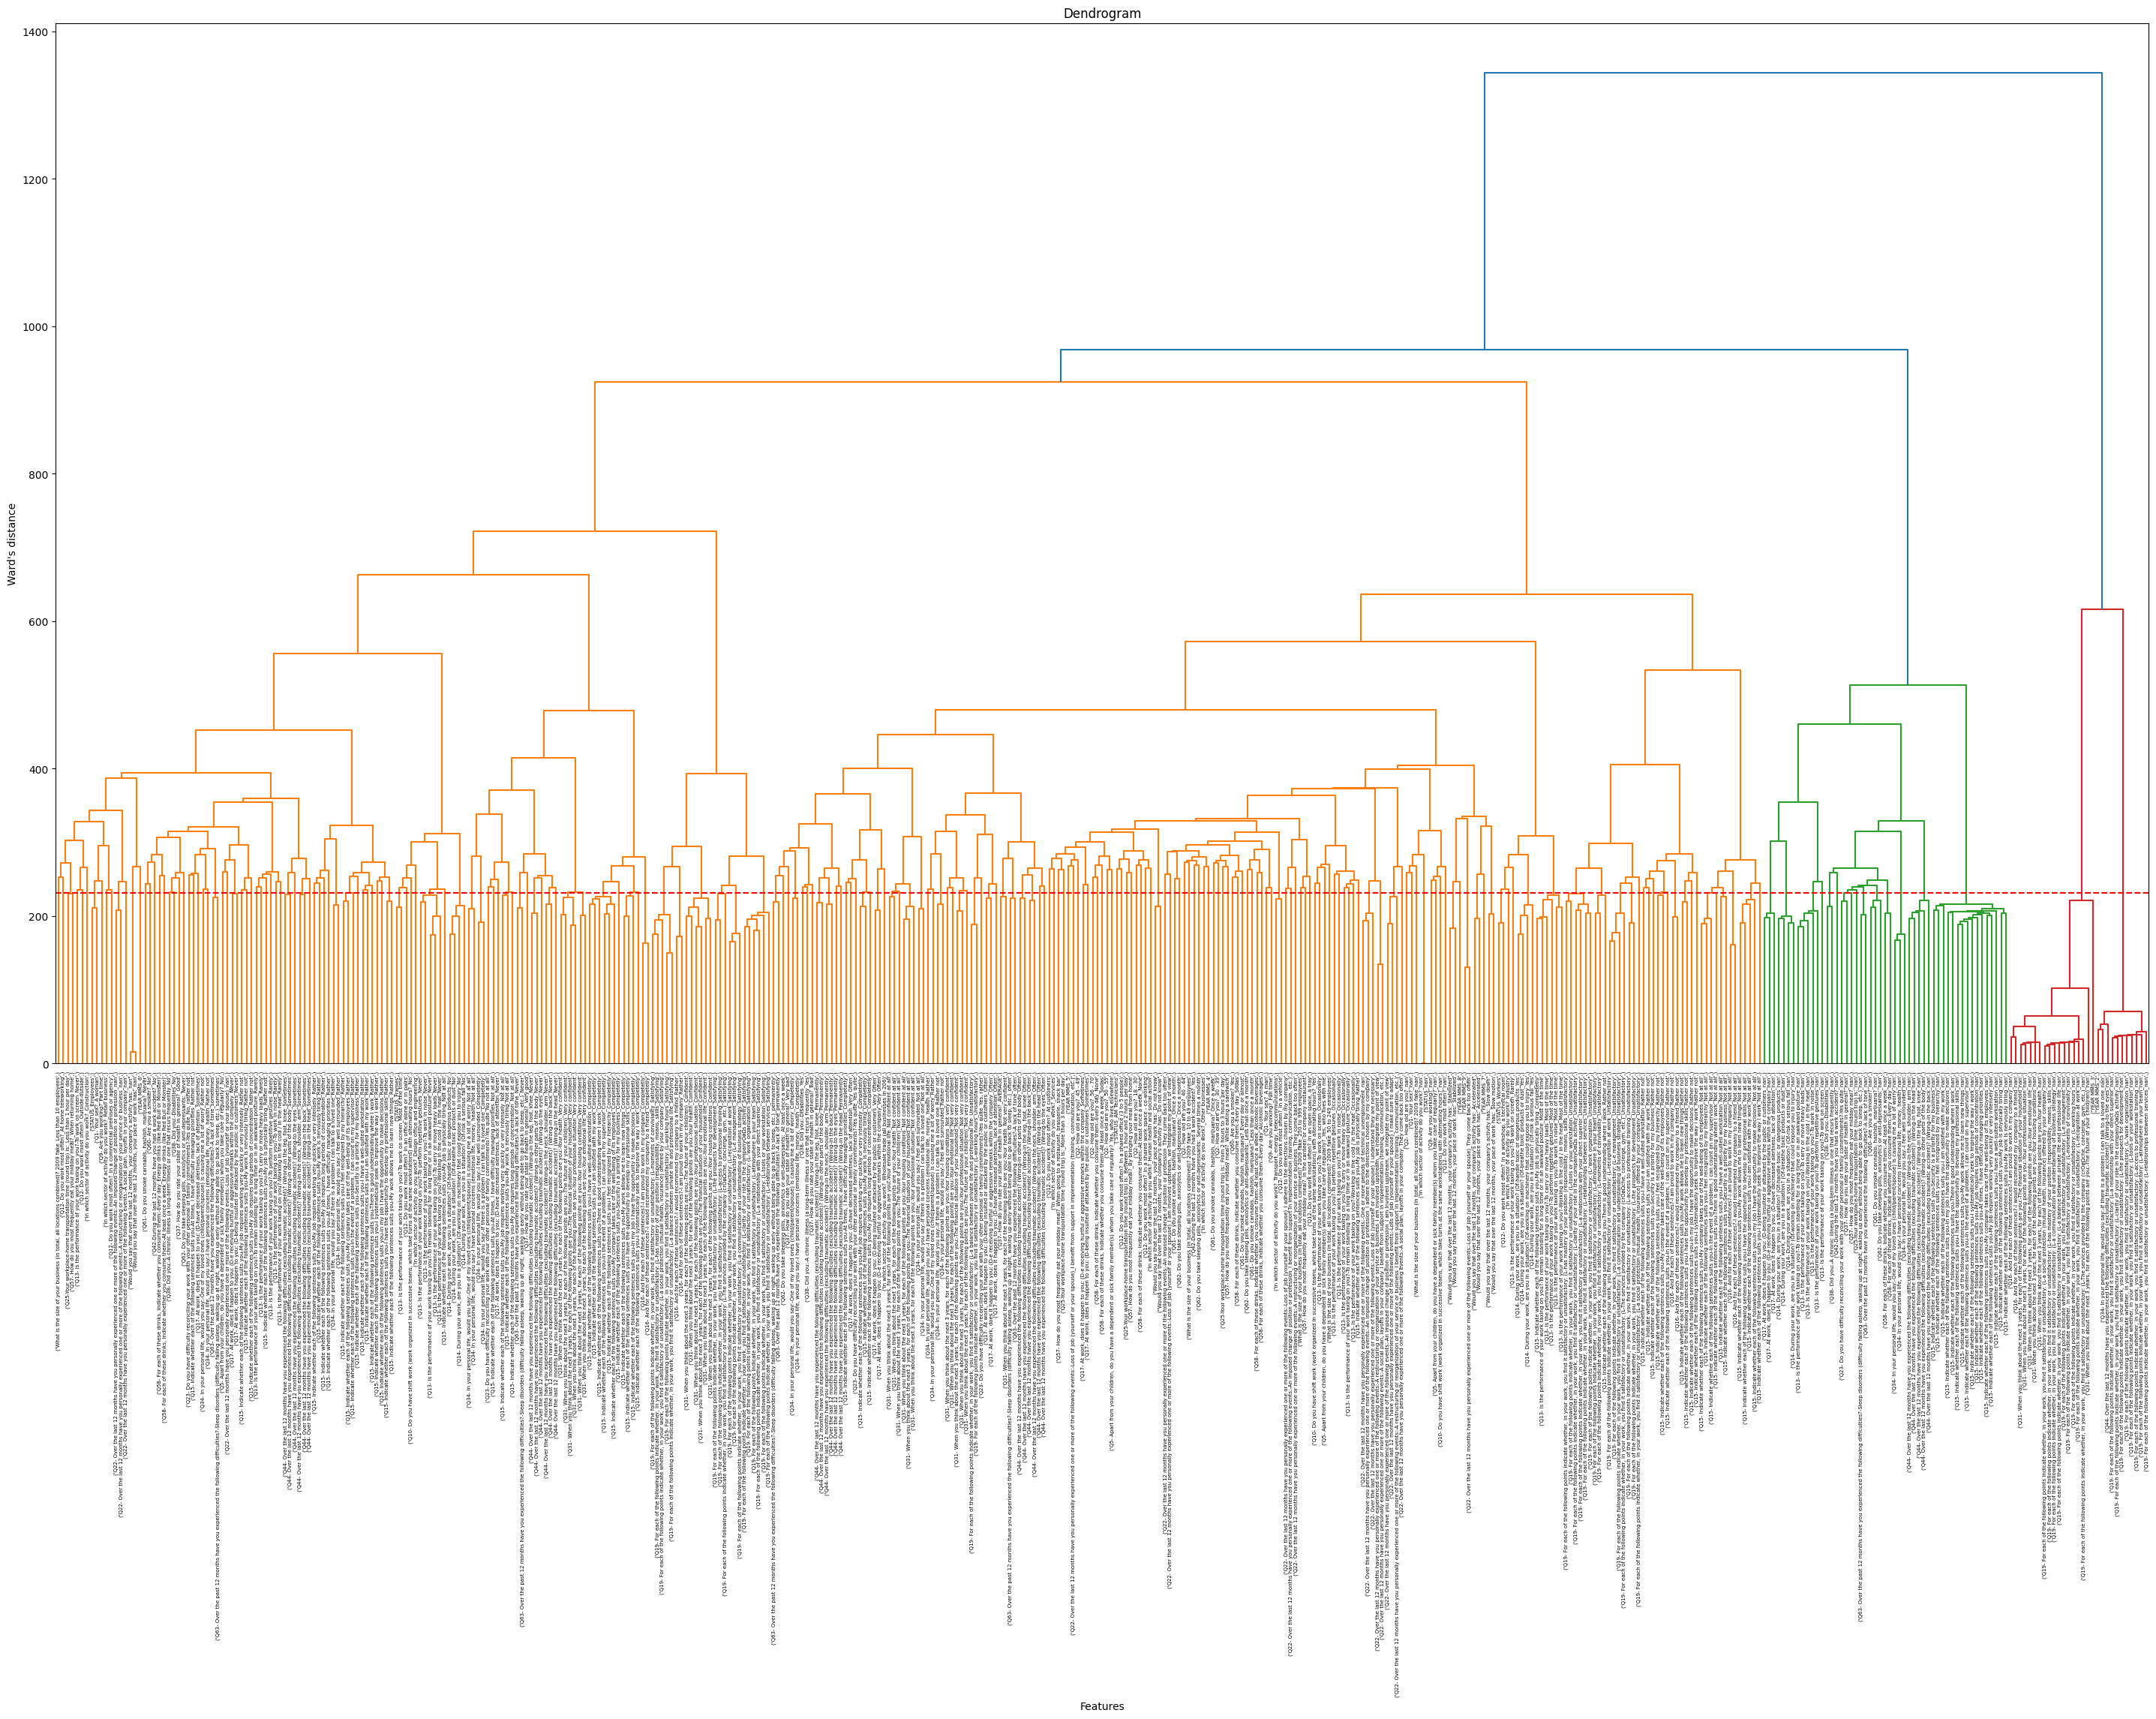

In [18]:
# Create a dendrogram to visualize the feature clustering
plt.figure(figsize=(36, 18)) 
plt.title('Hierarchical Clustering Dendrogram')

dendrogram(linked ,
            orientation='top', 
            labels=df_transposed.index,
            distance_sort='descending', 
            show_leaf_counts=True)
plt.axhline(y=threshold, color='r', linestyle='--')
# 45 degree angle for x axis labels
plt.xticks(rotation=90)
plt.title('Dendrogram')
plt.xlabel('Features')
plt.ylabel("Ward's distance")

plt.savefig('outputs/01_01_feat_cluster_29/dendrogram.png')

In [19]:
num_clusters = 56 # Adjust the number of clusters as needed (try 2, 3, 4, 8, 9 etc.)

labels = fcluster(linked, t=num_clusters, criterion='maxclust')

In [20]:
df_features_cleaned = df_features.copy()

# Clean the column names by replacing spaces and special characters with underscores
df_features_cleaned.columns = [str(col).replace(' ', '_').replace('?', '').replace('-', '_').replace('(', '').replace(')', '') for col in df_features.columns]

# Find correlation between features and outcome
correlations = []
for col in df_features_cleaned.columns:
    corr = data['outcome'].corr(df_features_cleaned[col])
    corr = round(corr, 3)
    correlations.append(corr)

In [21]:
df_clusters = pd.DataFrame(list(zip(df_features.columns , labels , correlations)),
                          columns=['feature','cluster','corr'])

df_clusters['abs_corr'] = df_clusters['corr'].abs()

df_clusters.sort_values(by=['cluster','abs_corr'], ascending=[True,False], inplace=True) 
df_clusters.reset_index(drop=True, inplace=True)
df_clusters.head(10)

feature  cluster   corr  abs_corr
0  ('Q19- For each of the following points indica...        1  0.100     0.100
1  ('Q19- For each of the following points indica...        1  0.100     0.100
2  ('Q31- When you think about the next 3 years, ...        1  0.100     0.100
3  ('Q31- When you think about the next 3 years, ...        1  0.100     0.100
4  ('Q16- And for each of these sentences?-I woul...        1  0.099     0.099
5  ('Q16- And for each of these sentences?-I am p...        1  0.099     0.099
6  ('Q19- For each of the following points indica...        1  0.099     0.099
7  ('Q19- For each of the following points indica...        1  0.099     0.099
8  ('Q19- For each of the following points indica...        1  0.099     0.099
9  ('Q19- For each of the following points indica...        1  0.099     0.099

In [22]:
c2_features = df_clusters[df_clusters['cluster']==2]['feature'].tolist() 
c3_features = df_clusters[df_clusters['cluster']==3]['feature'].tolist()

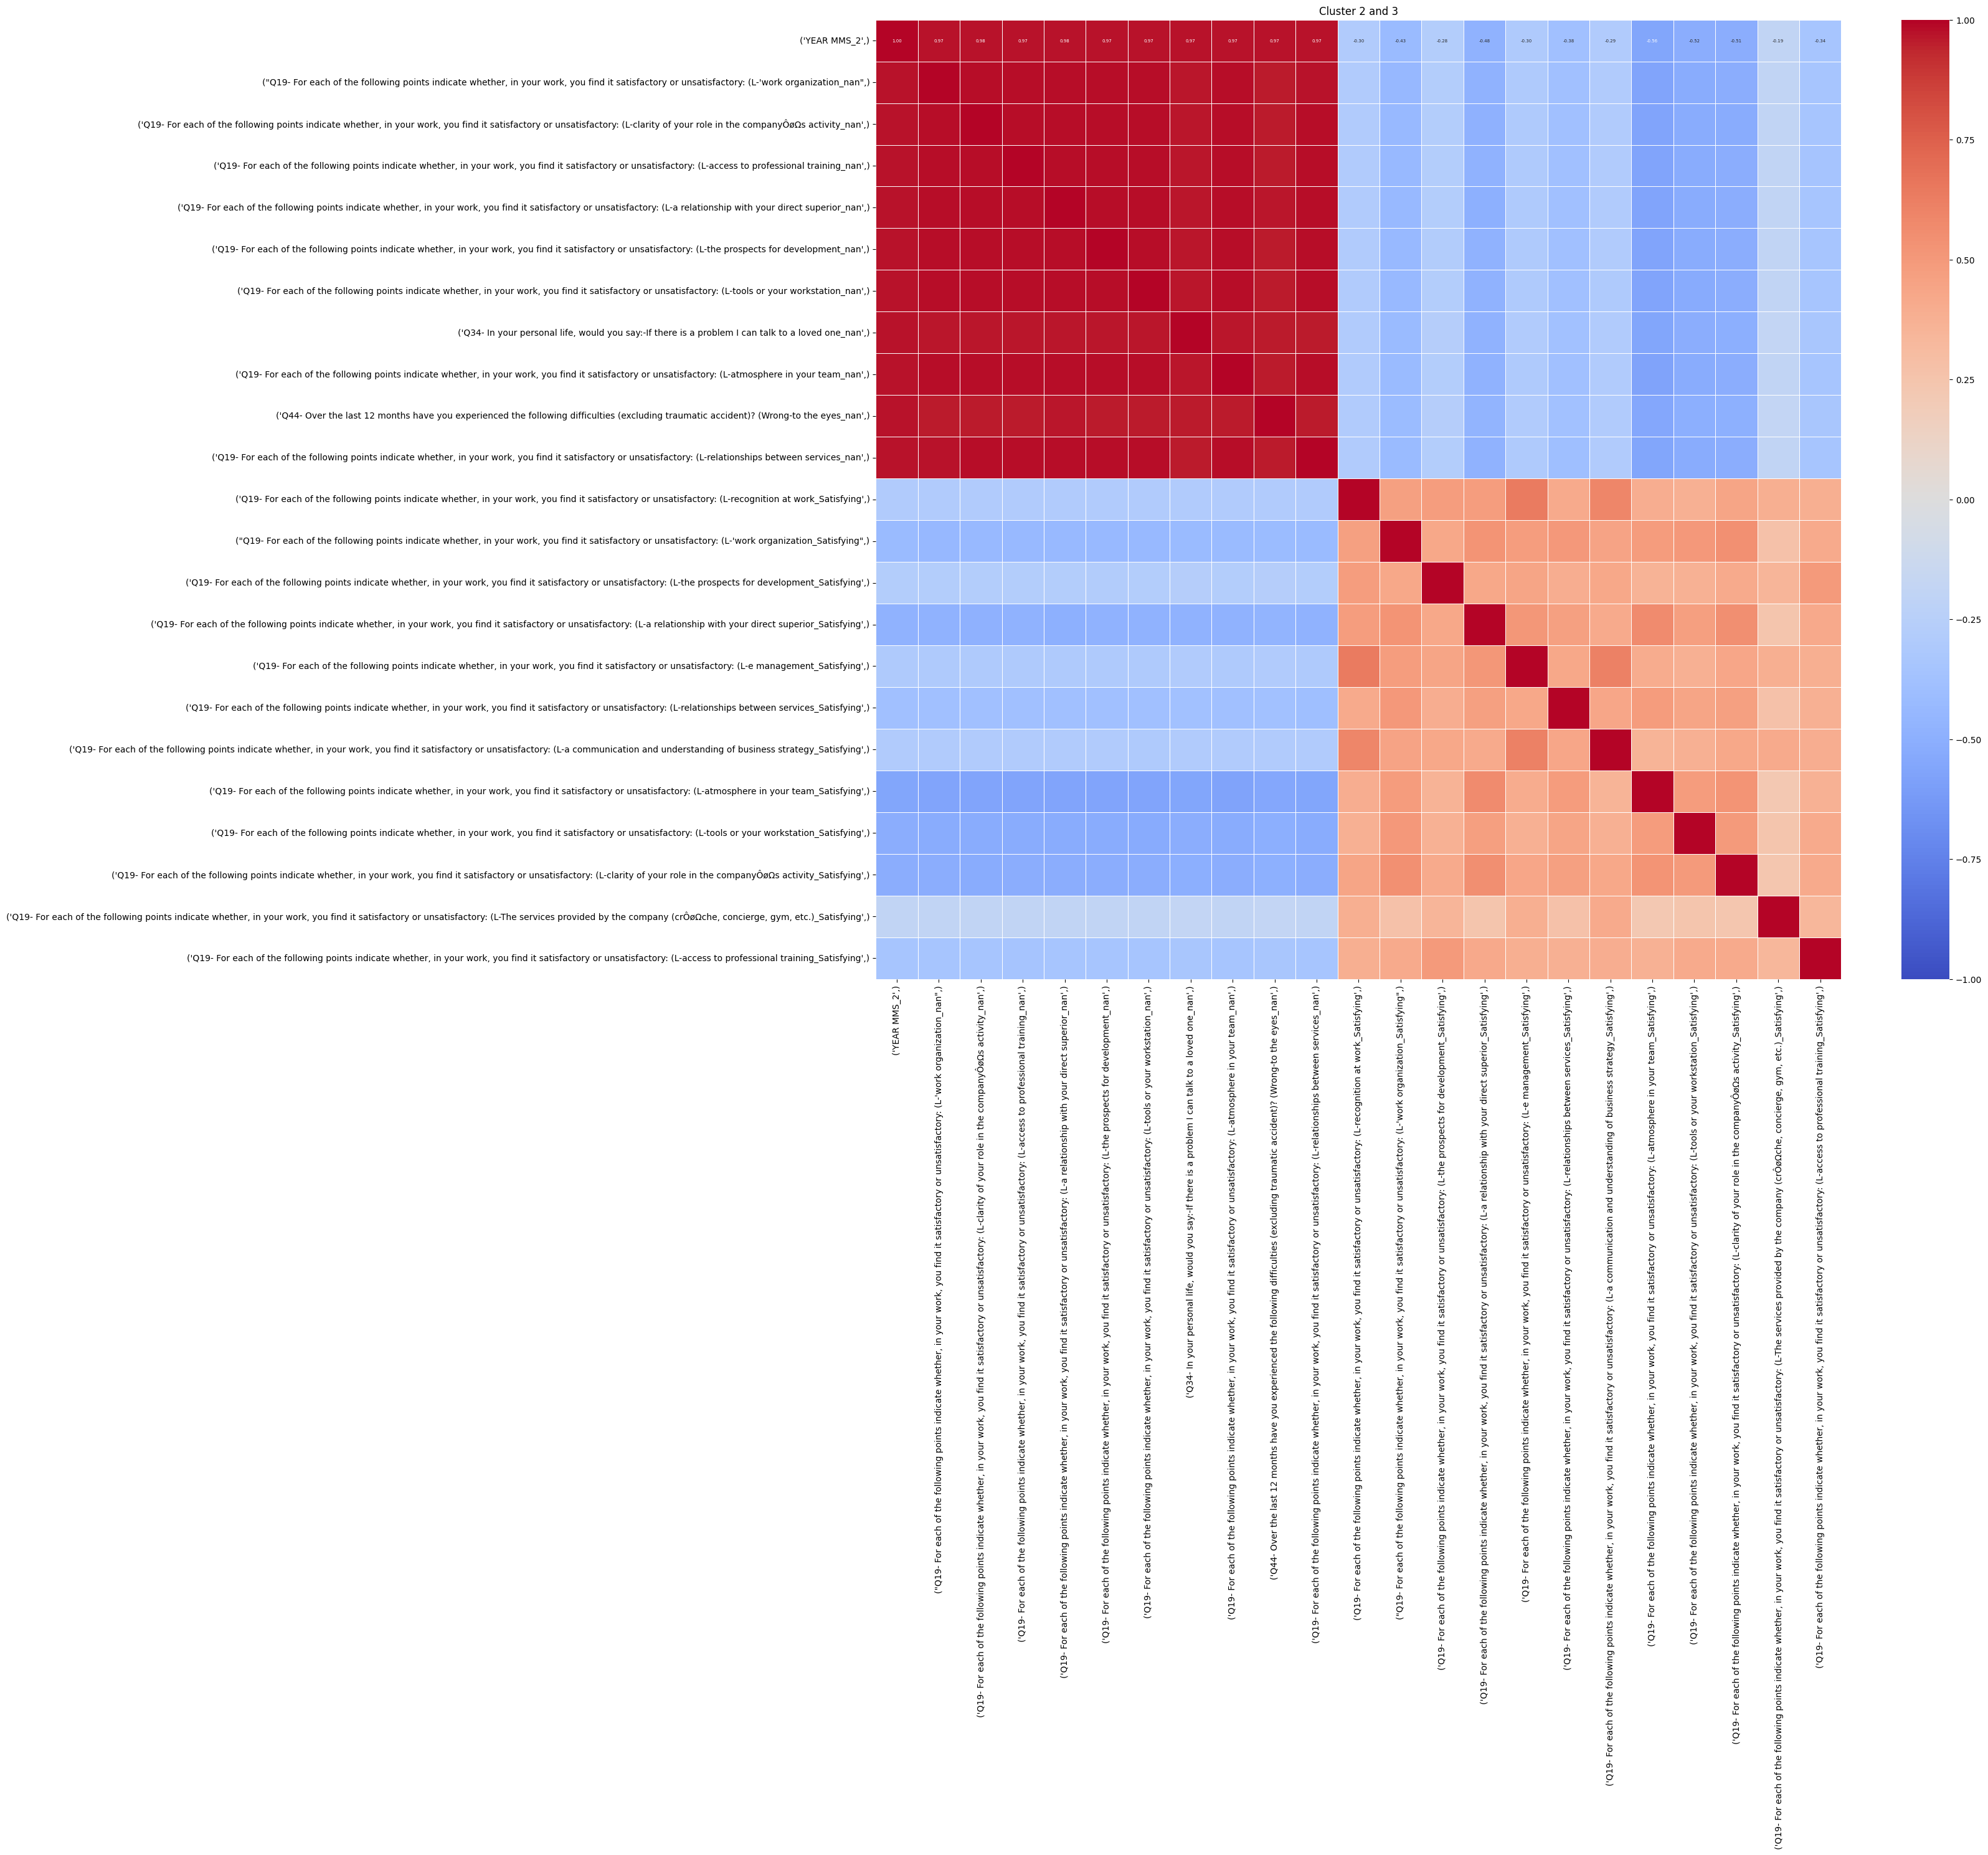

In [23]:
# Plot correlations for features in clusters 2 and 3
corr = df_features[np.append(c2_features ,c3_features)].corr()

# plot correlation matrix with correlation values in all cells
plt.figure(figsize=(25, 20)) 
sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5, 
            fmt=".2f",
            annot_kws={"size": 5}, 
            vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Cluster 2 and 3')


plt.savefig('outputs/01_01_feat_cluster_29/corr_cluster_2_3.png')

In [24]:
df_clusters.to_csv('outputs/01_01_feat_cluster_29/feature_clusters.csv', index=False, header=True, sep=';')

In [25]:
# print the features in each cluster

for i in range(1, num_clusters+1):
    print(f'Cluster {i}:')
    print(f"{df_clusters[df_clusters['cluster']==i]['feature'].values} \ncorr: {df_clusters[df_clusters['cluster']==i]['corr'].values}")
    print('\n')

Cluster 1:
["('Q19- For each of the following points indicate whether, in your work, you find it satisfactory or unsatisfactory: (L-a communication and understanding of business strategy_nan',)"
 "('Q19- For each of the following points indicate whether, in your work, you find it satisfactory or unsatisfactory: (L-has mastery of your position (responsibility, means, skills_nan',)"
 "('Q31- When you think about the next 3 years, for each of the following points are you:-Your professional situation_nan',)"
 "('Q31- When you think about the next 3 years, for each of the following points are you:-Your emotional life_nan',)"
 "('Q16- And for each of these sentences?-I would recommend my company to a friend_nan',)"
 "('Q16- And for each of these sentences?-I am proud to work in my company_nan',)"
 "('Q19- For each of the following points indicate whether, in your work, you find it satisfactory or unsatisfactory: (L-e management_nan',)"
 "('Q19- For each of the following points indicate wheth

# Different feature selections

## All features

In [26]:
# find the features with the highest importance in each cluster in a RF model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [27]:
# df_features = mice(df_features, df_features.columns)

In [28]:
categorical_cols = [col for col in data.columns if col not in not_cat]
data_features = data.drop('outcome', axis=1)
# one hot encode the data
data2 = pd.get_dummies(data_features[categorical_cols], drop_first=True)
data = pd.concat([data2, data['outcome']], axis=1)

In [29]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_features, data['outcome'], test_size=0.2, random_state=42)

In [30]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
ft_and_importances = []

for i in range(1, num_clusters+1):
    features = df_clusters[df_clusters['cluster']==i]['feature'].values

    for f in features:
        ft_index = df_features.columns.get_loc(f)
        importances = rf.feature_importances_[ft_index]
        ft_and_importances.append((i, f, importances))

for i in ft_and_importances:
    print(i)
    
df_importances = pd.DataFrame(ft_and_importances, columns=['cluster', 'feature', 'importance'])
# sort by cluster then importance
df_importances.sort_values(by=['importance', 'cluster'], ascending=[False, True], inplace=True)
df_importances.head(20)

(1, "('Q19- For each of the following points indicate whether, in your work, you find it satisfactory or unsatisfactory: (L-a communication and understanding of business strategy_nan',)", 0.0006362511615382537)
(1, "('Q19- For each of the following points indicate whether, in your work, you find it satisfactory or unsatisfactory: (L-has mastery of your position (responsibility, means, skills_nan',)", 0.0007279930765401013)
(1, "('Q31- When you think about the next 3 years, for each of the following points are you:-Your professional situation_nan',)", 0.0007459921154560473)
(1, "('Q31- When you think about the next 3 years, for each of the following points are you:-Your emotional life_nan',)", 0.0007137748497839237)
(1, "('Q16- And for each of these sentences?-I would recommend my company to a friend_nan',)", 0.0007405743238221258)
(1, "('Q16- And for each of these sentences?-I am proud to work in my company_nan',)", 0.000921150366729264)
(1, "('Q19- For each of the following points ind

cluster                                            feature  importance
272       37  ('Q42-During the last 12 months have you had a...    0.009679
350       47  ('Q38- Did you:-A chronic illness (a long-term...    0.008419
100       11  ('Q42-During the last 12 months have you had a...    0.007130
99        11  ('Q38- Did you:-A chronic illness (a long-term...    0.006216
311       41  ('Q37- How do you rate your state of health in...    0.005823
102       11  ('Q62- Do you take sleeping pills, anxiolytics...    0.005299
103       11  ('Q37- How do you rate your state of health in...    0.004895
243       33  ('What is the size of your business (in total,...    0.004731
140       18  ('Q44- Over the last 12 months have you experi...    0.004543
290       37                  ('Q2- How old are you?_30 - 39',)    0.004510
76         7  ('Q15- Indicate whether each of the following ...    0.004482
105       11  ('Q58- For each of these drinks, indicate whet...    0.004480
106       11  ('Q58- For each of these drinks, indicate whet...    0.004435
112       12  ('Q23- Do you have difficulty reconciling your...    0.004435
277       37  ('Q58- For each of these drinks, indicate whet...    0.004386
109       12  ('Q34- In your personal life, would you say:-I...    0.004364
273       37                           ('Q1- Your sex?_A man',)    0.004364
111       12  ('Q15- Indicate whether each of the following ...    0.004353
82         8  ('Q34- In your personal life, would you say:-I...    0.004351
78         7  ('Q15- Indicate whether each of the following ...    0.004335

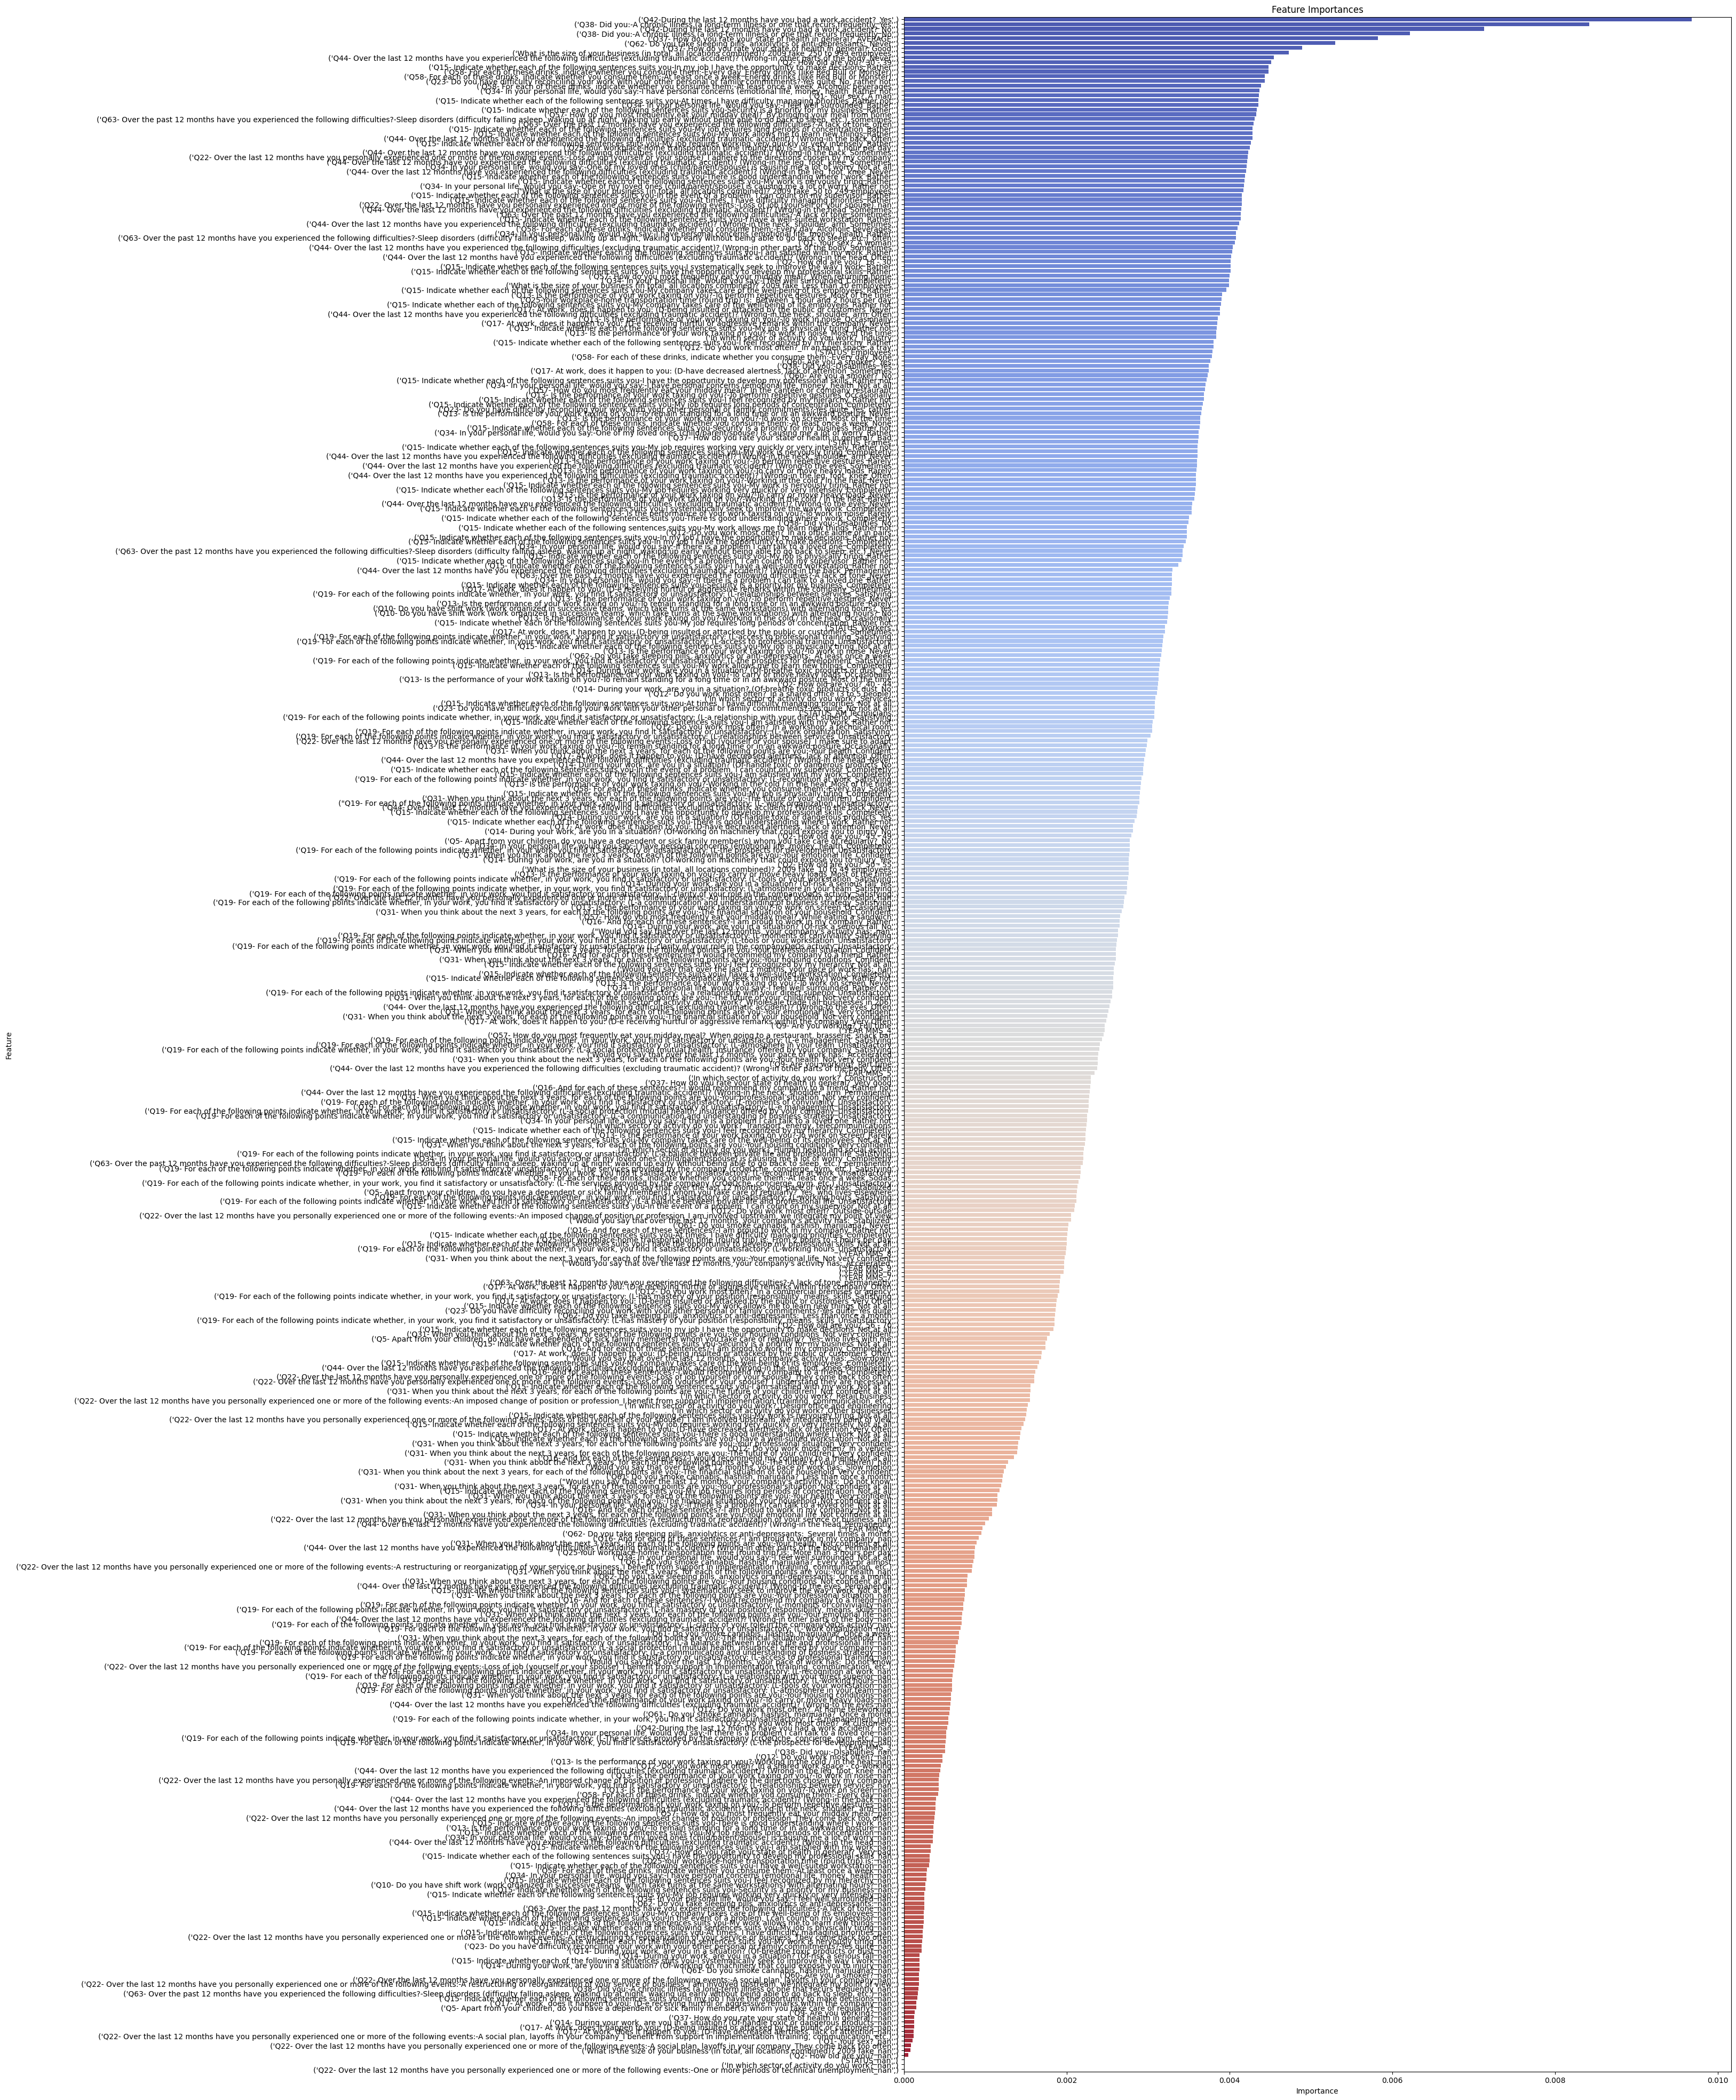

In [32]:
# plot the feature importances
plt.figure(figsize=(20, 50))
sns.barplot(x='importance', y='feature', data=df_importances, palette='coolwarm')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('outputs/01_01_feat_cluster_29/feature_importances_plot.png')
plt.show()

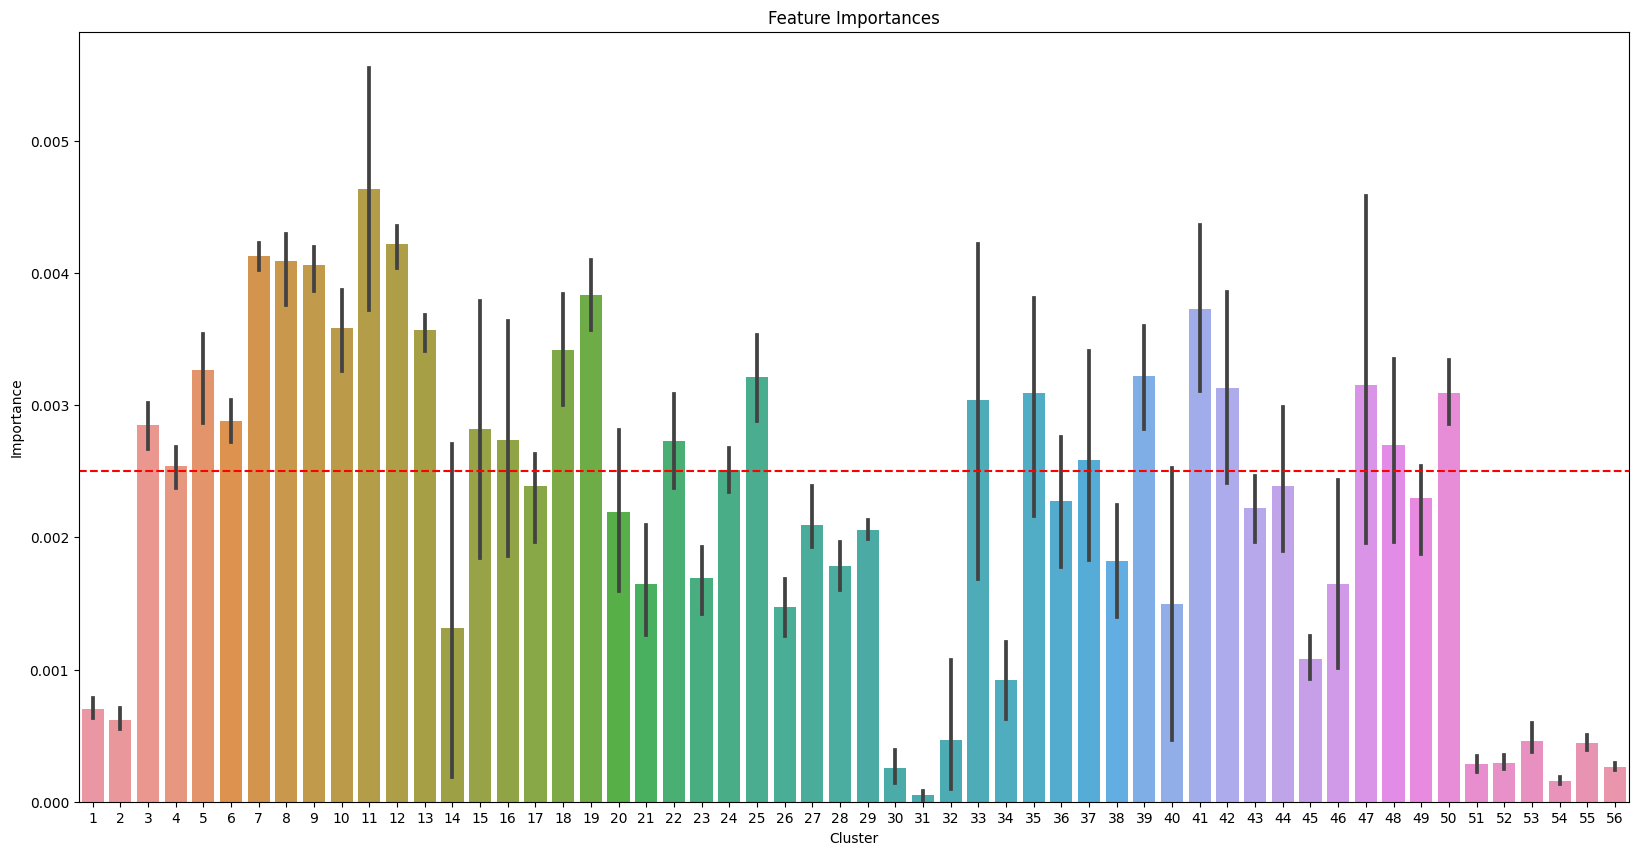

In [33]:
# plot impotance and cluster

plt.figure(figsize=(20, 10))
sns.barplot(x='cluster', y='importance', data=df_importances)
plt.title('Feature Importances')
plt.xlabel('Cluster')
plt.ylabel('Importance')
# line at 0.002 on y axis
plt.axhline(y=0.0025, color='r', linestyle='--')
plt.savefig('outputs/01_01_feat_cluster_29/feature_importances_plot_cluster.png')
plt.show()

## Most Important Feature from All Clusters (56)

In [34]:
# Get feature importances for each cluster
feature_importances = []

for i in range(1, num_clusters+1):
    print(f'Cluster {i}:')
    features = df_clusters[df_clusters['cluster']==i]['feature'].values

    ft_and_importances = []

    for f in features:
        ft_index = df_features.columns.get_loc(f)
        importances = rf.feature_importances_[ft_index]
        ft_and_importances.append((f, importances))

    highest_important_feat = []
    highest_importance = max(ft_and_importances, key=lambda x: x[1])

    for f, fi in ft_and_importances:
        if fi == highest_importance[1]:
            highest_important_feat.append(f)

    print(f'Highest importance: {highest_importance}')  

    feature_importances.append(highest_important_feat[0])

print(f'Feature importances: {feature_importances}')

Cluster 1:
Highest importance: ("('Q31- When you think about the next 3 years, for each of the following points are you:-The future of your child(ren)_nan',)", 0.0012765859064580456)
Cluster 2:
Highest importance: ("('YEAR MMS_2',)", 0.0009654063854563136)
Cluster 3:
Highest importance: ("('Q19- For each of the following points indicate whether, in your work, you find it satisfactory or unsatisfactory: (L-relationships between services_Satisfying',)", 0.0032826597941029334)
Cluster 4:
Highest importance: ("('Q31- When you think about the next 3 years, for each of the following points are you:-Your health_Confident',)", 0.002974066618394809)
Cluster 5:
Highest importance: ("('Q13- Is the performance of your work taxing on you?-To remain standing for a long time or in an awkward posture_Never',)", 0.003651646313975992)
Cluster 6:
Highest importance: ("('Q14- During your work, are you in a situation? (Of-breathe toxic products or dust_No',)", 0.0031119398252667466)
Cluster 7:
Highest impo

### Train with selected features (Highest from each (all) cluster)

In [35]:
# get the data with only the features in feature_importances
df_features_selected = df_features[feature_importances]
print(df_features_selected.shape)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_features_selected, data['outcome'], test_size=0.2, random_state=42)

print(X_train.shape)
X_test.shape

(37681, 56)
(30144, 56)


(7537, 56)

In [36]:
#  train a random forest model with the selected features
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X_train, y_train)

# get the predictions
y_pred = rf2.predict(X_test)

# get the accuracy
train_accuracy = rf2.score(X_train, y_train)
print(f'Train Accuracy: {train_accuracy}')

test_accuracy = rf2.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# get the classification report
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print(f'Classification report: \n{class_report}')

Train Accuracy: 0.9997346072186837
Test Accuracy: 0.6497280084914422
Classification report: 
              precision    recall  f1-score   support

           0       0.67      0.97      0.79      4788
           1       0.60      0.02      0.05       973
           2       0.37      0.01      0.02       685
           3       0.46      0.22      0.30      1091

    accuracy                           0.65      7537
   macro avg       0.52      0.31      0.29      7537
weighted avg       0.60      0.65      0.55      7537



## All Features above 0.0025 AND highest of the clusters not chosen

In [37]:
# select the clusters that have a featuer with importance > 0.0025
# from those clusers take the features with importance > 0.0025
# from the clusters that had no feature with importance > 0.0025 take the feature with the highest importance

selected_features = []
selected_clusters = []

for i in range(1, num_clusters+1):
    features = df_clusters[df_clusters['cluster']==i]['feature'].values

    for f in features:
        ft_index = df_features.columns.get_loc(f)
        importances = rf.feature_importances_[ft_index]

        if importances > 0.0025:
            selected_features.append(f)
            if i not in selected_clusters:
                selected_clusters.append(i)
            continue

    print(f'Selected features len: {len(selected_features)}')
    print(f'Selected clusters len: {len(selected_clusters)}')

# if there are clusters that have no feature with importance > 0.0025

if len(selected_features) < num_clusters:
    for i in range(1, num_clusters+1):
        features = df_clusters[df_clusters['cluster']==i]['feature'].values

        if i not in selected_clusters:
            ft_and_importances = []

            for f in features:
                ft_index = df_features.columns.get_loc(f)
                importances = rf.feature_importances_[ft_index]
                ft_and_importances.append((f, importances))

            highest_importance = max(ft_and_importances, key=lambda x: x[1])

            for f, fi in ft_and_importances:
                if fi == highest_importance[1]:
                    selected_features.append(f)
                    selected_clusters.append(i)

print(f'Selected features len: {len(selected_features)}, \nSelected features: {selected_features}')
print(f'Selected clusters len: {len(selected_clusters)}, \nSelected clusters: {selected_clusters}')


Selected features len: 0
Selected clusters len: 0
Selected features len: 0
Selected clusters len: 0
Selected features len: 10
Selected clusters len: 1
Selected features len: 19
Selected clusters len: 2
Selected features len: 29
Selected clusters len: 3
Selected features len: 33
Selected clusters len: 4
Selected features len: 44
Selected clusters len: 5
Selected features len: 50
Selected clusters len: 6
Selected features len: 56
Selected clusters len: 7
Selected features len: 63
Selected clusters len: 8
Selected features len: 71
Selected clusters len: 9
Selected features len: 78
Selected clusters len: 10
Selected features len: 84
Selected clusters len: 11
Selected features len: 85
Selected clusters len: 12
Selected features len: 89
Selected clusters len: 13
Selected features len: 91
Selected clusters len: 14
Selected features len: 93
Selected clusters len: 15
Selected features len: 101
Selected clusters len: 16
Selected features len: 105
Selected clusters len: 17
Selected features len: 

In [38]:
# get the data with only the selected features

df_features_selected_2 = df_features[selected_features]
print(df_features_selected_2.shape)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_features_selected_2, data['outcome'], test_size=0.2, random_state=42)

print(X_train.shape)
X_test.shape

(37681, 211)
(30144, 211)


(7537, 211)

In [39]:
# train a random forest model with the selected features
rf3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf3.fit(X_train, y_train)

# get the predictions
y_pred = rf3.predict(X_test)

# get the train and test accuracy
train_accuracy = rf3.score(X_train, y_train)
print(f'Train Accuracy: {train_accuracy}')

test_accuracy = rf3.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# get the classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification report: \n{class_report}')

Train Accuracy: 1.0
Test Accuracy: 0.6590155234178054
Classification report: 
              precision    recall  f1-score   support

           0       0.66      0.98      0.79      4788
           1       0.88      0.02      0.03       973
           2       1.00      0.00      0.01       685
           3       0.56      0.24      0.33      1091

    accuracy                           0.66      7537
   macro avg       0.78      0.31      0.29      7537
weighted avg       0.71      0.66      0.56      7537



### Find which clusters are more important